Notebook 4: Linear Regression
==========================

## Goals for learning
In this assignment, we will:

1) Perform a deep-dive into regression using linear regression and gradient descent
2) Practice working with the array-oriented programming paradigm
3) Gain experience working with off-the-shelf machine learning and data analysis libraries

## Instructions
* Read through the notebook.
* Answer any plain text questions (replace cell content, "YOUR RESPONSE HERE", with your response).
* Insert your code within the code blocks marked with the comments "# START your code here" and "# STOP your code here".
* Do not use loops, iteration, or recursion in any of the code cells (except where explicitly allowed).
* Do not use any "Generative AI" tools or assistants in the creation of your solutions.
* Do not import ot use any libraries other than those already imported outside the "# START your code here" and "# STOP your code here" blocks.
* Run all cells to make sure your code works and you see reasonable results.
    * All code cells should have output indicating the results of the last run when the notebook is submitted.
    * If there are errors, or if a code cell does not have output as submittted, points will be deducted.

## Submission details
* Due: Monday 09/29, 11:59 PM
* [Submission instructions](https://www.cs.oswego.edu/~agraci2/csc461/submission_instructions.html)

## Notebook premise
You have been hired as a machine learning engineer for a realestate company. Congratulations! You have been assigned the task of developing a regression model for predicting prices of new houses that come on the market.

## Data Wrangling

This project uses data from [House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) to perform training and evaluation

### Loading the data

In [1]:
import os.path
import numpy as np
import pandas as pd

# START your code here
     
# Path where you downloaded the training and test data
DATASET_ROOT_DIR='/home/agraci2/data/' # Please edit with your dataset path
RUN_UNIT_TESTS = True

# STOP your code here

In [2]:
# Read in the database
HOUSING_DATA_FILENAME = "kc_house_data.csv"
# assert os.path.isfile(os.path.join(DATASET_ROOT_DIR, HOUSING_DATA_FILENAME)), "Could not find database file at: {}".format(DATASET_ROOT_DIR)
# dataframe = pd.read_csv(os.path.join(DATASET_ROOT_DIR, HOUSING_DATA_FILENAME))

dataframe = pd.read_csv(HOUSING_DATA_FILENAME)

### Taking stock of the data

First thing you do is decide to get to know your data.

In [3]:
# START your code here
pd.set_option('display.max_columns',None)

print(dataframe.head())
print('------------------------------------------------------------')
print("Shape: ",dataframe.shape)
print("Number of dimensions: ",dataframe.ndim)
print("Size: ",dataframe.size)
print('------------------------------------------------------------')
print(dataframe.isna().sum())
print('------------------------------------------------------------')
print("Number of 0's in bedrooms: ",dataframe['bedrooms'].value_counts().get(0, 0))
print("Number of 0's in bathrooms: ",dataframe['bathrooms'].value_counts().get(0, 0))
# STOP your code here

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

##### **Question:** What is the dimensionality of this data?

##### **Question:** How many houses are represented in this data set?

### Handling missing values

The 'bedrooms' and 'bathroms' columns encode missing values as zeros, so you decide to replace any zeros you encounter with the mean of all remaining values.

Implementation suggestion:
* Replace zeros with np.NAN
* Find the mean, ignoring NANs
* Replace all NANs with the mean

In [4]:
# START your code here
# 1. replacing 0's
dataframe['bedrooms'] = dataframe['bedrooms'].replace(0,np.nan)
dataframe['bathrooms'] = dataframe['bathrooms'].replace(0,np.nan)

# double checking
print('Replaced 0s with NAs\n')
print("Number of 0's in bedrooms after replacement: ",dataframe['bedrooms'].value_counts().get(0, 0))
print("Number of 0's in bathrooms after replacement: ",dataframe['bathrooms'].value_counts().get(0, 0))

print("Number of na's in bedrooms after replacement: ",dataframe['bedrooms'].isna().sum())
print("Number of na's in bathrooms after replacement: ",dataframe['bathrooms'].isna().sum())

print('---------------------------------------------------')

# 2. get mean w/o nas
bed_mu = dataframe['bedrooms'].mean()
bath_mu = dataframe['bathrooms'].mean()

# check mean
print('Mean check\n')
print(bed_mu,'\n',bath_mu,'\n------------------------------------------------')

# 3. impute mean
dataframe['bedrooms'] = dataframe['bedrooms'].replace(np.nan,bed_mu)
dataframe['bathrooms'] = dataframe['bathrooms'].replace(np.nan,bath_mu)

# checky check
print('Imputed mean\n')
print("Number of na's in bedrooms after replacement: ",dataframe['bedrooms'].isna().sum())
print("Number of na's in bathrooms after replacement: ",dataframe['bathrooms'].isna().sum())

print("Bedroom records with mean after replacement: ",np.where(dataframe['bedrooms'] == 3.37287037037037))
print("Bathroom records with mean after replacement: ",np.where(dataframe['bathrooms'] == 2.1157362403369904))

# STOP your code here

Replaced 0s with NAs

Number of 0's in bedrooms after replacement:  0
Number of 0's in bathrooms after replacement:  0
Number of na's in bedrooms after replacement:  13
Number of na's in bathrooms after replacement:  10
---------------------------------------------------
Mean check

3.37287037037037 
 2.1157362403369904 
------------------------------------------------
Imputed mean

Number of na's in bedrooms after replacement:  0
Number of na's in bathrooms after replacement:  0
Bedroom records with mean after replacement:  (array([  875,  3119,  3467,  4868,  6994,  8477,  8484,  9773,  9854,
       12653, 14423, 18379, 19452]),)
Bathroom records with mean after replacement:  (array([  875,  1149,  3119,  5832,  6994,  9773,  9854, 10481, 14423,
       19452]),)


In [5]:
# Checkpoint
checkpoint_copy = dataframe.copy()
checkpoint_copy['bedrooms'] = checkpoint_copy['bedrooms'].replace(0, np.nan)
checkpoint_copy['bathrooms'] = checkpoint_copy['bathrooms'].replace(0, np.nan)

# Check for missing values
assert checkpoint_copy['bedrooms'].isna().sum() == 0, "Found NAN in bedrooms!"
assert checkpoint_copy['bathrooms'].isna().sum() == 0, "Found NAN in bathrooms!"

print("Passed checkpoint.")

Passed checkpoint.


### Removing unhelpful features
One of your colleagues did some analysis on this dataset, and determined that the following features were not strong indicators of a house's price:
* date
* floors
* yr_renovated
* condition
* sqft_basement
* id
* view
* sqft_lot15
* zipcode
* waterfront
* sqft_living15
* lat
* long

Your next step in wrangling the data is to remove these features.

In [6]:
# START your code here
dataframe = dataframe.drop(columns = [
        'date',
        'floors',
        'yr_renovated',
        'condition',
        'sqft_basement',
        'id',
        'view',
        'sqft_lot15',
        'zipcode',
        'waterfront',
        'sqft_living15',
        'lat',
        'long'
])
# STOP your code here

In [7]:
# Checkpoint
assert dataframe.shape == (21613, 8), "Unexpected dataframe shape: {}".format(dataframe.shape)

### Separating training and test sets
Now that you have determined that your data is an acceptable quality, you want to partition your data:
* Use an 80/20 split for training vs test
* Separate the features from the known labels

What you need to do: Identify the name of the column we will be treating as our label for this regression problem.

In [8]:
# START your code here
LABEL_COLUMN = 'price'
# STOP your code here

# We want to use an 80/20 split between our training and test sets
TRAINING_PERCENTAGE=80

# First, we will use the NumPy library to randomly select entries for either the training set or evaluation set
np_random = np.random.RandomState(seed=12345)
rand_unifs = np_random.uniform(0,1,size=dataframe.shape[0]) # A collection of random numbers [0,1) corresponding to each entry in our dataframe
division_threshold = np.percentile(rand_unifs, TRAINING_PERCENTAGE) # A threshold that the random numbers above can be checked against to see if they fall into the 80% or 20%

# The training set will use the first 80% of entries
train_indicator = rand_unifs < division_threshold # A collection of True/False indicators corresponding to each entry in our dataframe
train_dataframe = dataframe[train_indicator].reset_index(drop=True) # Filter our dataframe based on the training indicators above

# The test set will use the remaining 20% of entries
eval_indicator = rand_unifs >= division_threshold # A collection of True/False indicators corresponding to each entry in our dataframe (inverse of train_indicator)
eval_dataframe = dataframe[eval_indicator].reset_index(drop=True) # Filter our dataframe based on the evaluation indicators above

# Show how many entries (rows) are in our training vs evaluation dataframes:
print(f'Number of entries in the training set: {len(train_dataframe)}')
print(f'Number of entries in the evaluation set: {len(eval_dataframe)}')

# Separate the independent and dependent variables
train_independent_var = train_dataframe.drop(columns=[LABEL_COLUMN])
train_dependent_var = train_dataframe.loc[:,LABEL_COLUMN]
eval_independent_var = eval_dataframe.drop(columns=[LABEL_COLUMN])
eval_dependent_var = eval_dataframe.loc[:,LABEL_COLUMN]

Number of entries in the training set: 17290
Number of entries in the evaluation set: 4323


## Creating visualization tools
A couple of visualization functions are provided for you. They will help to understand what is going on when regressing on a single feature.

In [9]:
import matplotlib.pyplot as plt

# Plot X[0] vs y with the associated regression line
def DisplayPlot(X,y,W,b):
    w=W[0]
    print("Weight: {}".format(w))
    print("Bias: {}".format(b))
    x = X.iloc[:,0]
    plt.plot(x, y, 'bo')
    ax = plt.gca()
    lim_x = ax.get_xlim()
    lim_y = ax.get_ylim()
    plt.axline(xy1=(0, b), slope=w, label="known best")
    plt.xlabel(X.columns[0])
    plt.ylabel('price')
    ax = plt.gca()
    ax.set_xlim(lim_x)
    ax.set_ylim(lim_y)
    plt.legend(loc='best')
    plt.show()
    
# Plot X[0] vs y with the associated regression line
def DisplayPlot2(X,y,W,b,W2,b2, label1, label2):
    w=W[0]
    w2=W2[0]
    print("Weight: {}".format(w))
    print("Bias: {}".format(b))
    x = X.iloc[:,0]
    plt.plot(x, y, 'bo')
    ax = plt.gca()
    lim_x = ax.get_xlim()
    lim_y = ax.get_ylim()
    plt.axline(xy1=(0, b), slope=w, label=label1)
    plt.axline(xy1=(0, b2), slope=w2, color='orange', label=label2)
    plt.xlabel(X.columns[0])
    plt.ylabel('price')
    ax = plt.gca()
    ax.set_xlim(lim_x)
    ax.set_ylim(lim_y)
    plt.legend(loc='best')
    plt.show()

In [10]:
# Algebraic solution that finds the weights and bias that define the line that best fits X vs. Y
def AlgebraicBestFit(X,Y,lam=0):
    num_samples = X.shape[0]
    num_features = X.shape[1]
    Y_col = Y.reshape(-1,1)
    constants = np.ones((num_samples,1))
    X = np.concatenate((constants, X), axis=1)
    XT = np.transpose(X)
    XTX = XT @ X
    I = np.identity(num_features+1)
    beta = np.linalg.pinv(XTX + num_samples*lam*I) @ XT
    beta = np.dot(beta, Y).reshape(num_features+1,1)
    assert beta.shape == (num_features+1, 1)
    
    # Reformat results
    beta = beta.reshape(beta.shape[0],)
    W = beta[1:]
    b = beta[0]
    return (W, b)

Feature: sqft_living
Weight: 272.0208779025477
Bias: -26871.53846215344


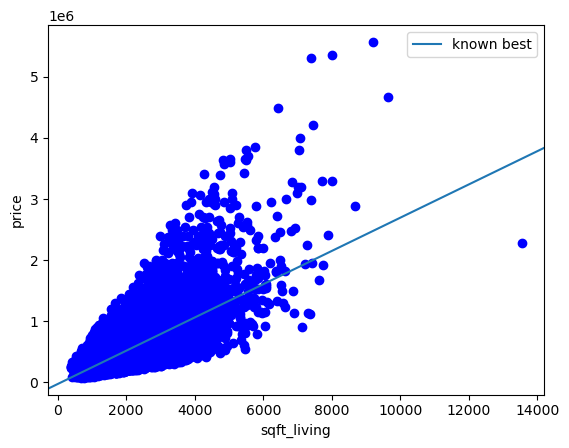

In [11]:
# Regress y against a single feature in X and display the resulting plot
def RegressSingleFeature(X, y, feature):
    print("Feature: {}".format(feature))
    x = X.loc[:, [feature]]
    W, b = AlgebraicBestFit(x.to_numpy(), y.to_numpy(), lam=0)
    DisplayPlot(x, y, W, b)
    
RegressSingleFeature(train_independent_var, train_dependent_var, 'sqft_living')

## Evaluating the model
Once the "best fit" is known, you can use it to predict prices for new houses. For now, we can use the algebraic solution for linear regression to get a "true" best fit line. Later on, we will look at the Gradient Descent algorithm for determining a "best fit" line.

### Making Predictions
In order to evaluate the model, you need to implement a function to **predict** the value of $y$ (house price) based on a set of features $X$. The equation for applying the **weights** and **bias** that were calculated as part of your model to the new **feature vector** is as follows:

$$ y_p = XW + b = x_0w_0 + x_1w_1 + ... + x_nw_n + b$$

<u>Implementation Hints</u>
* The NumPy [sum](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sum.html) function was helpful for my implementation.
* Review how arithmetic operators work with NumPy N-Dimensional arrays (See NB3_AddendumA_Matrices)

In [12]:
# Calculate the predicted Y-values (house prices)
def Predict(X, W, b):
    Y_p = None

    # START your code here
    Y_p = X.dot(W) + b
    # STOP your code here

    assert Y_p.shape == (X.shape[0],)
    return Y_p

In [17]:
# # emma test
# W, b = AlgebraicBestFit(train_independent_var.to_numpy(), train_dependent_var.to_numpy())
# print('W: ',W,'\n-----------------------------------\nb: ',b,'\n---------------------------------\nX: ',eval_independent_var.sum(),'\n----------------------------------------')
# # print((eval_independent_var.sum() * W.sum()) + b)
# print('X shape[0]: ',(eval_independent_var).shape[0])
# print('--------------------------------------------')
# print('X shape: ',(eval_independent_var).shape)
# print('--------------------------------------------')
# ytest = (eval_independent_var).dot(W) + b
# print('Y_p: ',ytest)
# print('Y_p shape: ',ytest.shape)

In [14]:
W, b = AlgebraicBestFit(train_independent_var.to_numpy(), train_dependent_var.to_numpy())
Y_p = Predict(eval_independent_var, W, b)

In [15]:
# # checky check
# print(Y_p[0])
# print(Y_p[1])
# print(Y_p[2])

310173.32375700306
314687.8307867339
407859.6960702706


In [16]:
# Checkpoint
assert Y_p.shape == eval_dependent_var.shape
assert abs(Y_p[0] - 310173.3) < 0.1
assert abs(Y_p[1] - 314687.8) < 0.1
assert abs(Y_p[2] - 407859.7) < 0.1
print("Passed checkpoint!")

Passed checkpoint!


### Calculating Residuals
In linear regression problems, a **residual** ($e$) is the distance between the true value and the predicted value:

$$ e = y_t - y_p $$

### Calculating the Mean Square Error
The **mean square error** is a common metric for evaluating a regression model's performance, and uses the **residuals** as  a building block.

$$ \textsf{MSE} = {\sum_i^N{(e_i)^2} \over N} $$

The **lower** the mean square error (MSE) is, the closer the linear regression model fits the data, and the better performance is.

<u>Implementation Hints</u>
* The NumPy [square](https://numpy.org/doc/stable/reference/generated/numpy.square.html) function may be of interest.
* The NumPy [sum](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sum.html) function was helpful for my implementation.
* Review how arithmetic operators work with NumPy N-Dimensional arrays (See NB3_AddendumA_Matrices).

In [20]:
# Calculate the predicted Y-values (house prices)
def CalculateMse(Y_t, Y_p):
    mse = np.nan
    
    # There should be one known and one predicted label
    # per data point in our training set
    num_data_points = Y_t.shape[0]
    assert num_data_points == Y_p.shape[0]
    
    # START your code here
    mse = np.mean(np.square(Y_p - Y_t))
    # STOP your code here

    return mse

In [21]:
mse = CalculateMse(eval_dependent_var, Y_p)
print("MSE: {}".format(mse))

MSE: 64876669619.2007


## Finding the best fit line using Gradient Descent
Previously, the "best fit" line was handed to us from the algorithmic function. In the cells below, we will explore using out intuitive, simplified variant of the **gradient descent algorithm** to find the line.

In [40]:
# Perform one step of the Gradient Descent Algorithm
def StepGradientDescent(X, Y_t, W, b, lr, display):
    W_prev = W
    b_prev = b
    
    MOVE_DOWN = -1 * lr
    MOVE_UP = 1 * lr
    
    '''
    TO DO:
    1) Calculate the predicted labels given the current line (Y_p)
    2) Calculate the MSE using the current predictions
    3) Select a random point and move the weight(s) and bias up or down to move the line closer
       * If x is positive:
           - If the true point is above the predicted point: Increase the weights and bias
           - If the true point is below the predicted point: Decrease the weights and bias
       * If x is negative:
           - If the true point is above the predicted point: Increase the weights and Decrease bias
           - If the true point is below the predicted point: Decrease the weights and Increase bias
    '''
    error = None # store your error in this variable

    # START your code here
    Y_p = Predict(X, W, b) #1
    mse = CalculateMse(Y_t, Y_p) #2

    #3
    i = np.random.randint(0, X.shape[0])
    randomX = X.iloc[i, 0]
    y_true = Y_t.iloc[i]
    y_pred = Y_p[i]

    #3a
    if (randomX > 0):
        if (y_true > y_pred):
            W = W_prev + (MOVE_UP * randomX)
            b = b_prev + MOVE_UP
        elif (y_true < y_pred):
            W = W_prev + (MOVE_DOWN * randomX)
            b = b_prev + MOVE_DOWN

    #3b
    elif (randomX < 0):
        if (y_true > y_pred):
            W = W_prev + (MOVE_UP * randomX)
            b = b_prev + MOVE_DOWN
        elif (y_true < y_pred):
            W = W_prev + (MOVE_DOWN * randomX)
            b = b_prev + MOVE_UP
        
    error = y_true - y_pred
    # STOP your code here
    
    if display:
        print("Weights: {}, Bias: {}, Error: {}".format(W, b, error))
        DisplayPlot2(X, Y, W_prev, b_prev, W, b, "Previous", "Current")
    
    return W, b

In [41]:
# Run a "batch" gradient descent (with all data points at once)
def GradientDescent(W, b, X, Y, lr, epochs, display):
    for i in range(epochs):
        if display:
            print("========================================================================================================================")
            print("Epoch: {}".format(i))
        W, b = StepGradientDescent(X, Y, W, b, lr, display)
    return W, b

(17290, 1)
Epoch: 0
Weights: [161000.], Bias: 50, Error: 768000.0
Weight: 0.0
Bias: 0


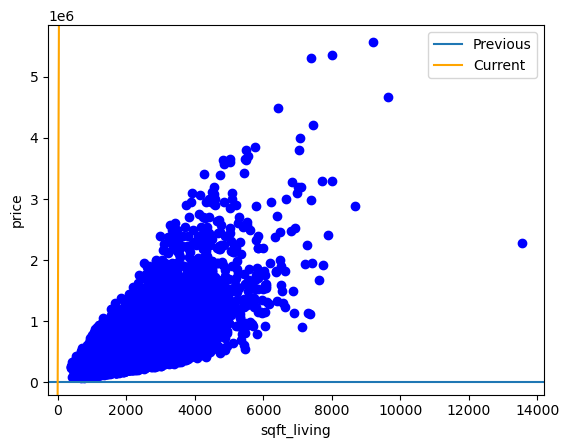

Epoch: 1
Weights: [60500.], Bias: 0, Error: -323120050.0
Weight: 161000.0
Bias: 50


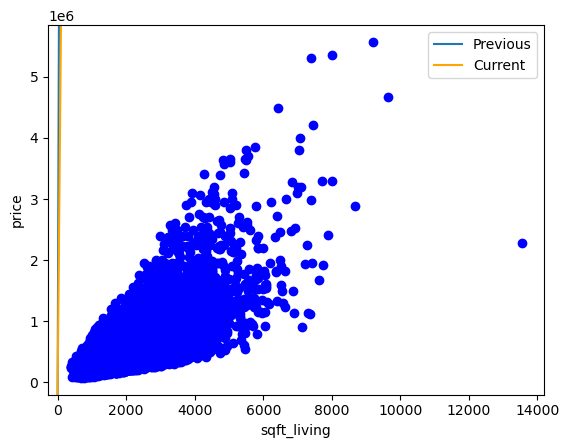

Epoch: 2
Weights: [-96250.], Bias: -50, Error: -189293000.0
Weight: 60500.0
Bias: 0


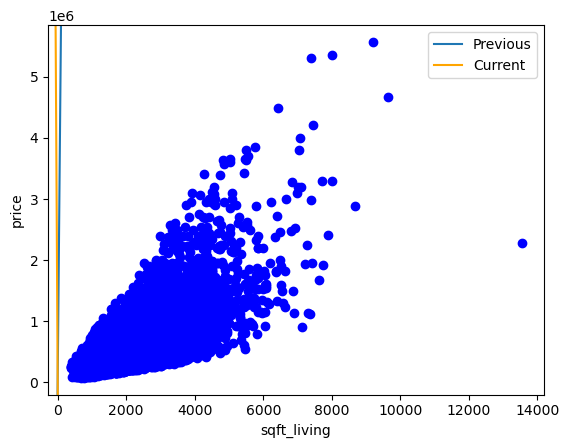

Epoch: 3
Weights: [31250.], Bias: 0, Error: 246087550.0
Weight: -96250.0
Bias: -50


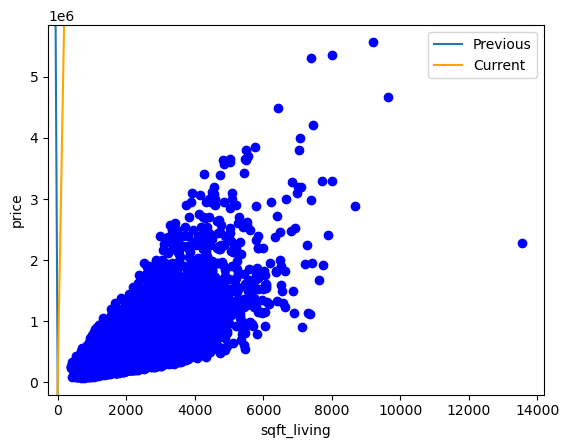

Epoch: 4
Weights: [-25750.], Bias: -50, Error: -35381200.0
Weight: 31250.0
Bias: 0


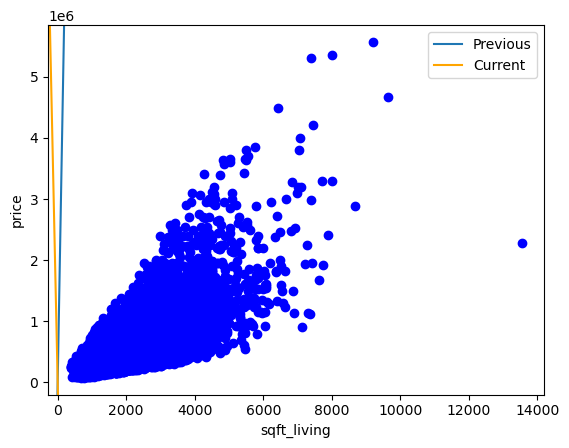

Epoch: 5
Weights: [13750.], Bias: 0, Error: 20460675.0
Weight: -25750.0
Bias: -50


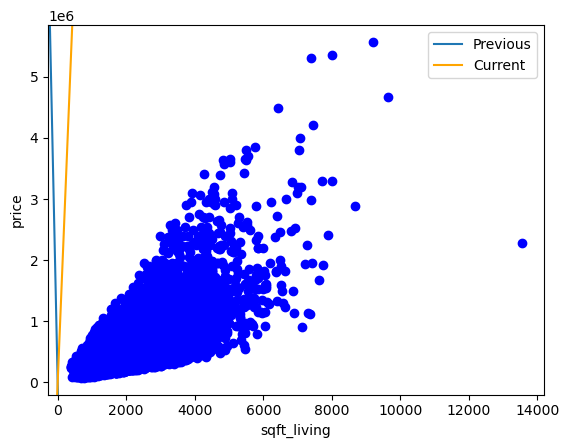

Epoch: 6
Weights: [-124250.], Bias: -50, Error: -36846010.0
Weight: 13750.0
Bias: 0


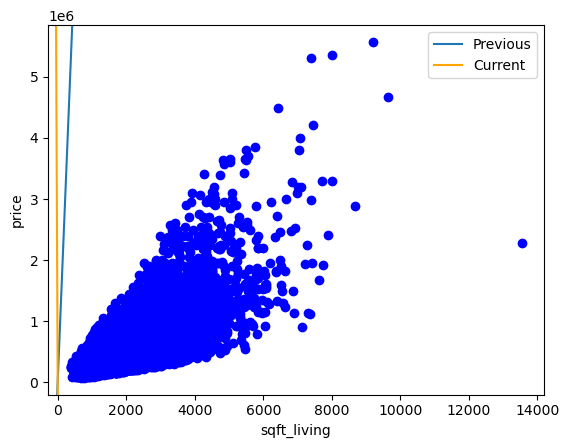

True weights and bias: [272.0208779], -26871.53846215344
Learned weights and bias: [-124250.], -50


In [42]:
# Attempt gradient descent on a single variable (make it easier to visualize)
X = train_independent_var.loc[:,['sqft_living']]
Y = train_dependent_var
print (X.shape)

# Initialize with the starting weight and bias (set to zero)
W = np.zeros((X.shape[1]))
b = 0

# Hyperparameters
epochs = 7 # Epochs: how many times to iterate
lr = 50 # Learning Rate (lr): how quickly to change during each iteration
display=True # If set to true, display a graph and detailed data for each step

# Run the Gradient Descent algorithm on our modified data
W, b = GradientDescent(W, b, X, Y, epochs=epochs, lr=lr, display=display)

# Grab the "true" best fit line so we can compare
W_t, b_t = AlgebraicBestFit(X.to_numpy(), Y.to_numpy())

print("True weights and bias: {}, {}".format(W_t, b_t))
print("Learned weights and bias: {}, {}".format(W, b))

##### **Question:** Did your gradient descent line converge to the same value as the "true" line?

##### **Question:** What do you think we could do differently to improve our results?

##### Congratulations, you have reached the end of this notebook!

**BONUS (Optional)** Play with the *hyperparameters* to see if you can get closer to the true line.

(17290, 1)
Epoch: 0
Weights: [66.5], Bias: 0.05, Error: 425000.0
Weight: 0.0
Bias: 0


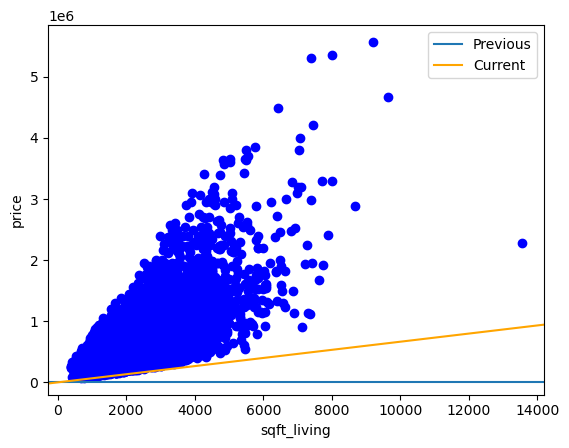

Epoch: 1
Weights: [111.5], Bias: 0.1, Error: 255149.95
Weight: 66.5
Bias: 0.05


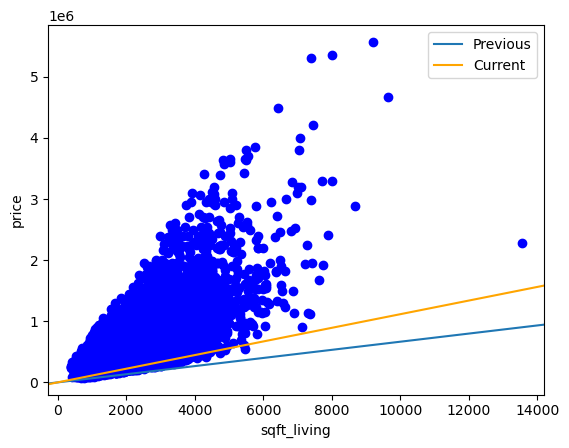

Epoch: 2
Weights: [168.5], Bias: 0.15000000000000002, Error: 135389.9
Weight: 111.5
Bias: 0.1


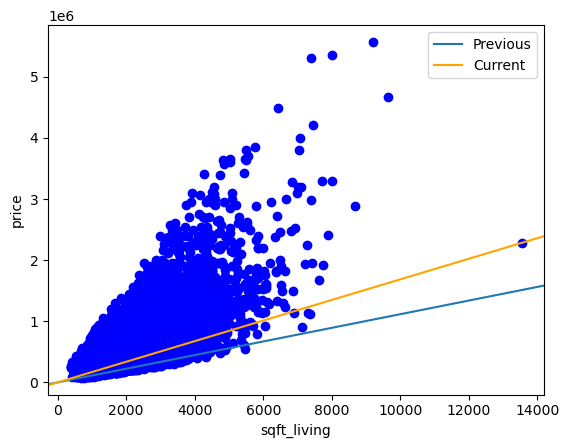

Epoch: 3
Weights: [283.], Bias: 0.2, Error: 350134.85
Weight: 168.5
Bias: 0.15000000000000002


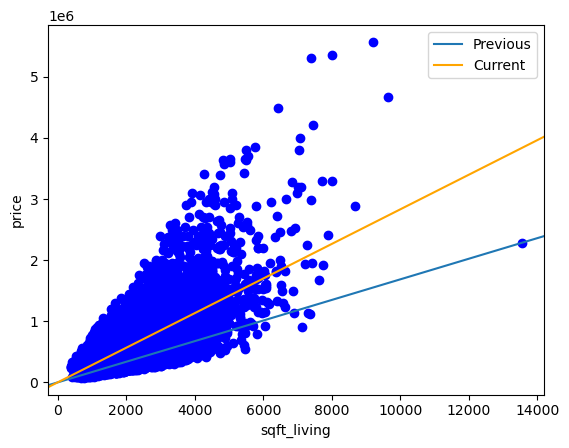

Epoch: 4
Weights: [321.5], Bias: 0.25, Error: 97089.79999999999
Weight: 283.0
Bias: 0.2


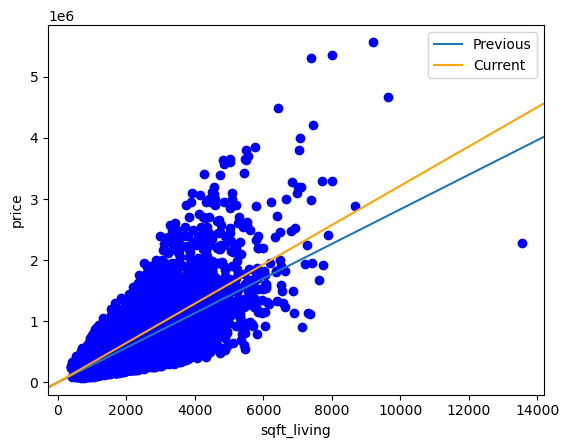

Epoch: 5
Weights: [223.], Bias: 0.2, Error: -344355.25
Weight: 321.5
Bias: 0.25


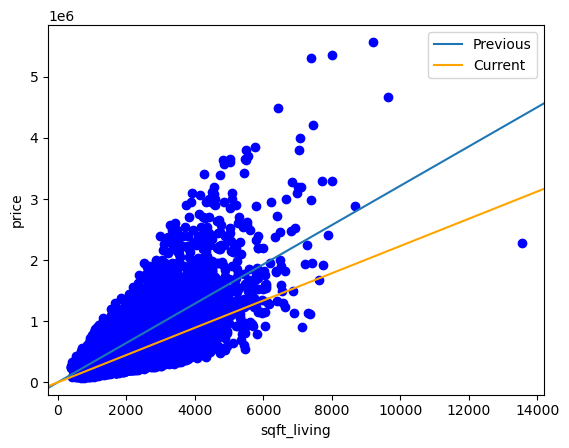

Epoch: 6
Weights: [284.5], Bias: 0.25, Error: 125659.79999999999
Weight: 223.0
Bias: 0.2


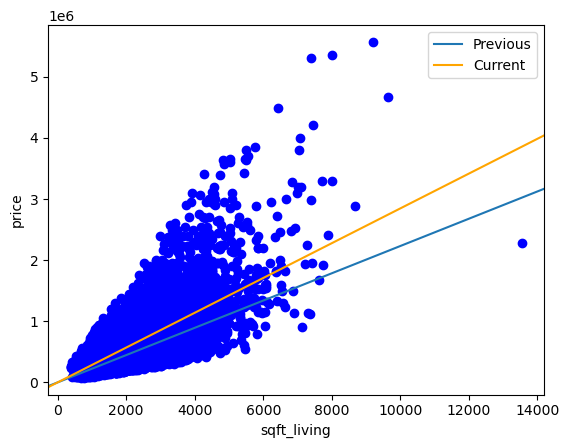

Epoch: 7
Weights: [234.5], Bias: 0.2, Error: -59500.25
Weight: 284.5
Bias: 0.25


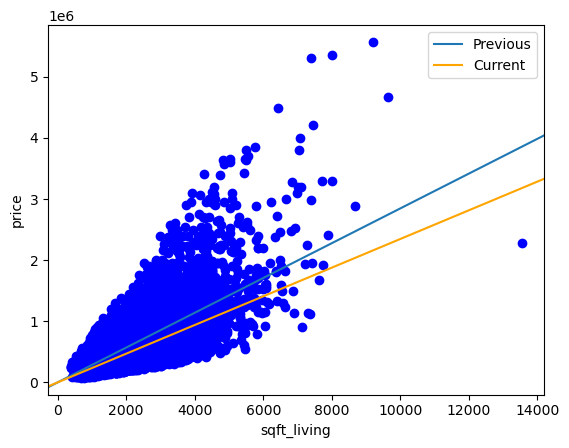

Epoch: 8
Weights: [310.], Bias: 0.25, Error: 70904.79999999999
Weight: 234.5
Bias: 0.2


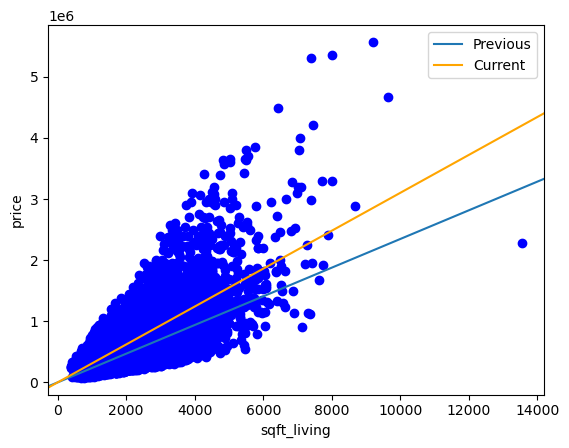

Epoch: 9
Weights: [250.], Bias: 0.2, Error: -123000.25
Weight: 310.0
Bias: 0.25


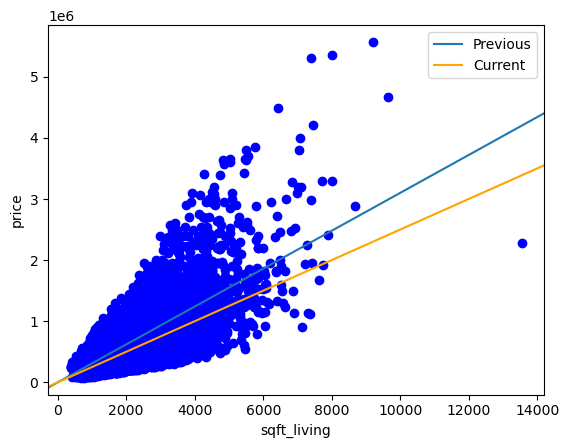

Epoch: 10
Weights: [137.], Bias: 0.15000000000000002, Error: -240000.19999999995
Weight: 250.0
Bias: 0.2


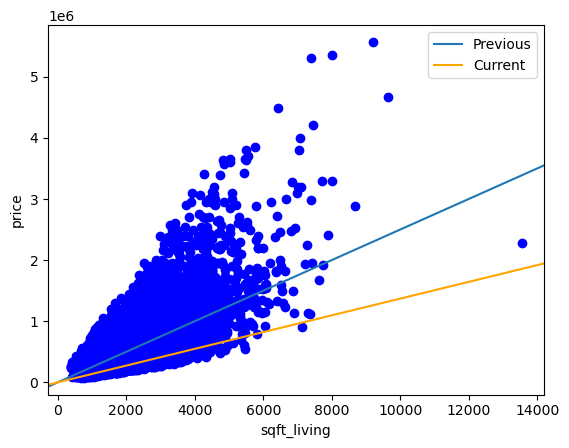

Epoch: 11
Weights: [254.5], Bias: 0.2, Error: 978049.85
Weight: 137.0
Bias: 0.15000000000000002


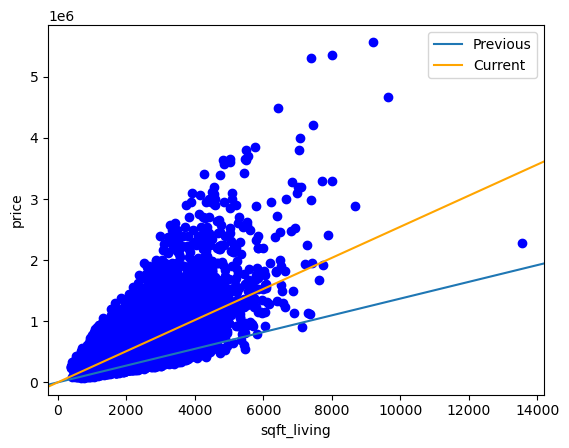

Epoch: 12
Weights: [313.5], Bias: 0.25, Error: 84689.79999999999
Weight: 254.5
Bias: 0.2


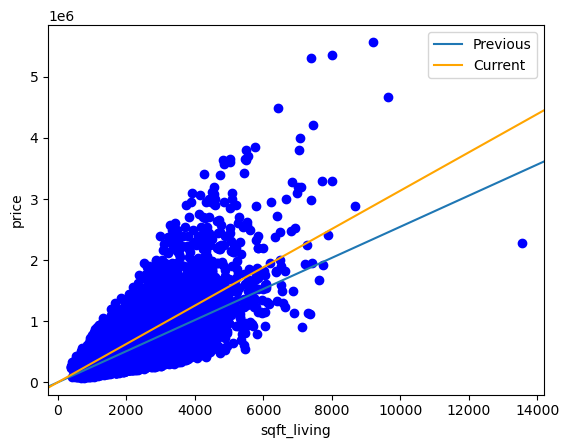

Epoch: 13
Weights: [368.], Bias: 0.3, Error: 193284.75
Weight: 313.5
Bias: 0.25


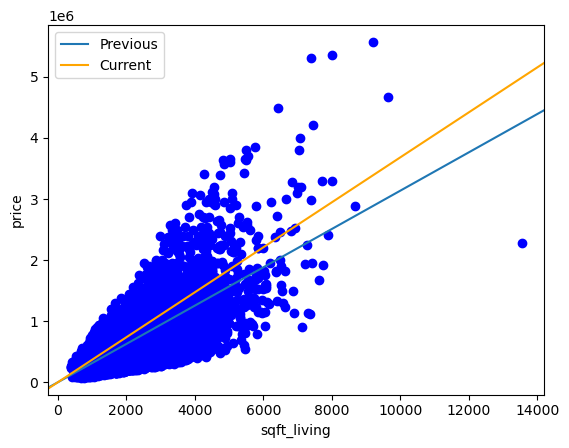

Epoch: 14
Weights: [322.5], Bias: 0.25, Error: -101980.29999999999
Weight: 368.0
Bias: 0.3


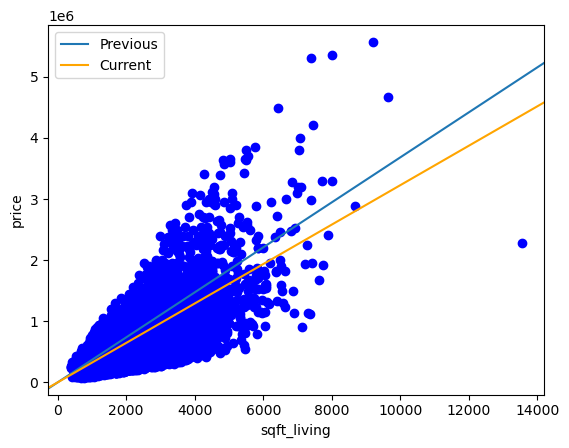

True weights and bias: [272.0208779], -26871.53846215344
Learned weights and bias: [322.5], 0.25


In [46]:
# Attempt gradient descent on a single variable (make it easier to visualize)
X = train_independent_var.loc[:,['sqft_living']]
Y = train_dependent_var
print (X.shape)

# Initialize with the starting weight and bias (set to zero)
W = np.zeros((X.shape[1]))
b = 0

# START your code here

# Hyperparameters
epochs = 15 # Epochs: how many times to iterate
lr = 0.05 # Learning Rate (lr): how quickly to change during each iteration
display=True # If set to true, display a graph and detailed data for each step

# STOP your code here

# Run the Gradient Descent algorithm on our modified data
W, b = GradientDescent(W, b, X, Y, epochs=epochs, lr=lr, display=display)

# Grab the "true" best fit line so we can compare
W_t, b_t = AlgebraicBestFit(X.to_numpy(), Y.to_numpy())

print("True weights and bias: {}, {}".format(W_t, b_t))
print("Learned weights and bias: {}, {}".format(W, b))